/Users/crystalwarta/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[[-0.47507326 -0.21268576]
 [ 2.28164414  6.26294717]
 [ 1.44246388  0.26318773]]


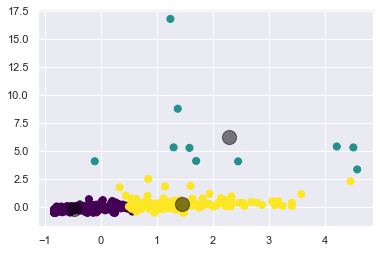


[[-0.4729905  -0.21224978]
 [ 1.44944221  0.26519616]
 [ 2.28164414  6.26294717]]


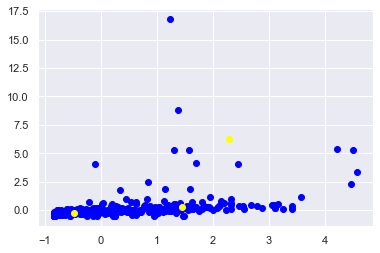

In [27]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import math
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib inline
    
class Kmeans:
    
    def yolo(self, X):
        print(X)
    
    def __init__(self):
        print()

    def score(self, X):
        inertia = 0
        for a in range(rowsOfData):
            if thisInstance.distance_metric=="euclidean":
                inertia = inertia + (np.linalg.norm(X[a]-closestCentroidArray[a]))**2
            else:
                inertia = inertia + (abs(X[a,0] - closestCentroidArray[a,0]) + \
                                     abs(X[a,1] - closestCentroidArray[a,1]) + \
                                     abs(X[a,2] - closestCentroidArray[a,2]) + \
                                     abs(X[a,3] - closestCentroidArray[a,3]) + \
                                     abs(X[a,4] - closestCentroidArray[a,4]) + \
                                     abs(X[a,5] - closestCentroidArray[a,5]))**2
        return inertia
    
    def fit(self, X, k, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
        thisInstance.distance_metric = distance_metric
        
        X1 = X[:,0]
        X2 = X[:,1]
    
    
        bestInertia = math.inf
        for y in range(0,n_init):

    
            #plt.plot() 
            #plt.title('Dataset1') 
            #plt.scatter(X1, X2)
        
            previousInertia = math.inf
    
    
            #K-Means++ *************************************************
        
            #get a random centroid
            random = X[np.random.randint(rowsOfData, size=1), :]

            centroids = np.array(random)
    
            #plot first centroid
            #plt.scatter(centroids[:,0], centroids[:,1], color = 'red', zorder=10)
        
            #keep an array of the shortest distance to a centroid for each point
            closestDistToCentroid = np.zeros(shape=(rowsOfData,1))
        
            #keep a sum of the distances from all points to their closest centroid
            sumOfDistancesToCentroidSquared = 0

            #getting initial centroids
            for a in range(k-1):
                farthestDist = 0
                for b in range(rowsOfData):
                    closestDistToCentroid[b] = math.inf
                    for c in range(centroids.shape[0]): 
                        if distance_metric=="euclidean":
                            distanceToACentroid = np.linalg.norm(X[b,:]-centroids[c,:])
                        else:
                            distanceToACentroid = abs(X[b,0] - centroids[c,0]) + \
                            abs(X[b,1] - centroids[c,1]) + abs(X[b,2] - centroids[c,2]) + \
                            abs(X[b,3] - centroids[c,3]) + abs(X[b,4] - centroids[c,4]) + abs(X[b,5] - centroids[c,5])
                        
                        if closestDistToCentroid[b] > distanceToACentroid:
                            closestDistToCentroid[b] = distanceToACentroid
                            closestCentroid = centroids[c,:]
                        
                    sumOfDistancesToCentroidSquared = sumOfDistancesToCentroidSquared + (closestDistToCentroid[b])**2

                #get distribution of each point of data
                distribution = np.zeros(shape=(rowsOfData))
            
                for b in range(rowsOfData):
                    distribution[b] = ((closestDistToCentroid[b])**2) / sumOfDistancesToCentroidSquared
            
                #make sure distribution adds up to 1
                p = np.array(distribution)

                p /= p.sum()
            
                #This is the point the distrubution picked to be the centroid
                farthestPointByDistribution = np.random.choice(rowsOfData, 1, p=p)
            
                #add and plot new centroid
                centroids = np.vstack([centroids, X[farthestPointByDistribution]])
                #plt.scatter(X[farthestPointByDistribution,0], X[farthestPointByDistribution,1],  color = 'red', zorder=30)
        
        
            #END K-Means++ ***************************************************
    
    
            for z in range(0,max_iter):
                #K-Means Assignment step ***************************************
        
                for a in range(rowsOfData):
                    closestDistToCentroid = math.inf
                    for b in range(k): 
                        if distance_metric=="euclidean":
                            distanceToACentroid = np.linalg.norm(X[a,:]-centroids[b,:])
                        else:
                            distanceToACentroid = abs(X[a,0] - centroids[b,0]) + \
                            abs(X[a,1] - centroids[b,1]) + abs(X[a,2] - centroids[b,2])
                            abs(X[a,3] - centroids[b,3]) + abs(X[a,4] - centroids[b,4]) + abs(X[a,5] - centroids[b,5])
                        if closestDistToCentroid > distanceToACentroid:
                            closestDistToCentroid = distanceToACentroid
                            closestCentroid = centroids[b,:]
                    closestCentroidArray[a] = closestCentroid
    
        
                #K-Means Recenter step ******************************************

    
                #adds up all of the X plots for that centroid
                sumOfAllX = np.zeros(shape=(k,1))
                sumOfAllY = np.zeros(shape=(k,1))
    
                #keeps the number of points that are closest to that centroid
                numberOfClosePoints = np.zeros(shape=(centroids.shape[0],1))
    
    
                for a in range(rowsOfData):
                    for b in range(k): 
                        if closestCentroidArray[a,0] == centroids[b,0] and closestCentroidArray[a,1] == centroids[b,1]:
                            sumOfAllX[b,0] = sumOfAllX[b,0] + X[a,0]
                            sumOfAllY[b,0] = sumOfAllY[b,0] + X[a,1]
                            numberOfClosePoints[b] = numberOfClosePoints[b] + 1
                
                #print(numberOfClosePoints)
                
                MeanOfX = np.zeros(shape=(k,1))    
                MeanOfY = np.zeros(shape=(k,1)) 
    
                #get the new cluster centers
                for a in range(k):
                    MeanOfX[a,0] = sumOfAllX[a,0]/numberOfClosePoints[a]
                    MeanOfY[a,0] = sumOfAllY[a,0]/numberOfClosePoints[a]
        
                #plt.scatter(MeanOfX, MeanOfY, color="black", zorder=5) 
        
        
        
        
                #get score of this test
            
                inertia = thisInstance.score(X)       
        
                #run kmeans until inertia is less than tolerance
                if tol > previousInertia - inertia:  
                    break
            
                previousInertia = inertia
        
                #new centroids
                for a in range(k):
                    centroids[a,0] = MeanOfX[a,0]
                    centroids[a,1] = MeanOfY[a,0]
        
        
            #plt.scatter(MeanOfX, MeanOfY, color="yellow", zorder=20) 
            #plt.show() 
    
        #get best result
            if bestInertia > inertia:
                bestInertia = inertia
                bestCentroids = centroids
                
                
        closestCentroidz = np.zeros(shape=(centers.shape[0]))
        for a in range(rowsOfData):
            minDist = math.inf
            for b in range(centroids.shape[0]):
                #print(X[a])
                #print(centers[b])
                distanceToACentroid = np.linalg.norm(X[a]-centroids[b])
                if minDist > distanceToACentroid:
                    minDist = distanceToACentroid
                    minCentroid = b
            closestCentroidz[minCentroid] = closestCentroidz[minCentroid] + 1
                
        #print(closestCentroidz)
        print(bestCentroids)
        
        plt.scatter(X1, X2, color="blue", zorder=10)
        plt.scatter(bestCentroids[:,0], bestCentroids[:,1], color="yellow", zorder=20) 
        plt.show()
    
distance_metric=""

all_data = pd.read_csv('/Users/crystalwarta/Downloads/movies_metadata.csv')

all_data = all_data.dropna()

all_data.drop(all_data[all_data['vote_count'] <= 30 ].index, inplace=True)

#my_data = all_data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()
my_data = all_data[['vote_count', 'popularity']].copy()

#col_names = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
col_names = ['vote_count', 'popularity']

scaler = StandardScaler()

X = my_data.to_numpy()

X = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# for a in range(rowsOfData):
#     minDist = math.inf
#     for b in range(centers.shape[0]):
#         #print(X[a])
#         #print(centers[b])
#         distanceToACentroid = np.linalg.norm(X[a]-centers[b])
#         if minDist > distanceToACentroid:
#             minDist = distanceToACentroid
#             minCentroid = b
#     closestCentroid[minCentroid] = closestCentroid[minCentroid] + 1
            
# print(closestCentroid)
plt.show()

closestCentroid = np.zeros(shape=(centers.shape[0]))
rowsOfData = X.shape[0];
closestCentroidArray = np.zeros(shape=(rowsOfData,2))

thisInstance = Kmeans()

thisInstance.fit(X, 3, 50)

/Users/crystalwarta/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[[-0.63050112 -0.26739067 -0.62186244 -0.72629776 -0.57571634 -0.65347652]
 [ 0.050252   -0.06704524 -0.01112001  0.32636985  0.29929201  0.00592867]
 [ 1.57775818  0.89271171  1.70970721  1.1380529   0.79939194  1.75205069]]


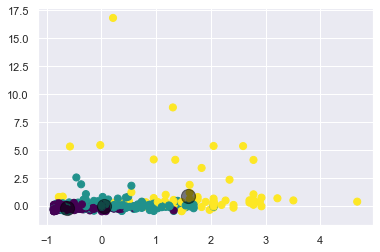


[[-0.15687273 -0.07436719  0.13494597 -0.21259855  0.96061644 -0.19579657]
 [ 1.60364699  0.85843543  1.98224387  1.31191724  1.18315166  1.64091453]
 [-0.43611187 -0.24272864 -0.66975665 -0.30227595 -1.15346815 -0.71899433]]


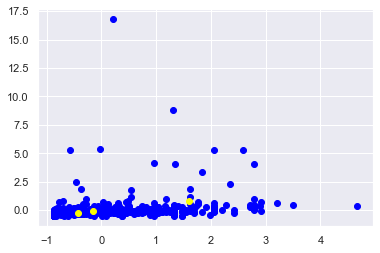

In [26]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import math
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib inline
    
class Kmeans:
    
    def yolo(self, X):
        print(X)
    
    def __init__(self):
        print()

    def score(self, X):
        inertia = 0
        for a in range(rowsOfData):
            if thisInstance.distance_metric=="euclidean":
                inertia = inertia + (np.linalg.norm(X[a]-closestCentroidArray[a]))**2
            else:
                inertia = inertia + (abs(X[a,0] - closestCentroidArray[a,0]) + \
                                     abs(X[a,1] - closestCentroidArray[a,1]) + \
                                     abs(X[a,2] - closestCentroidArray[a,2]) + \
                                     abs(X[a,3] - closestCentroidArray[a,3]) + \
                                     abs(X[a,4] - closestCentroidArray[a,4]) + \
                                     abs(X[a,5] - closestCentroidArray[a,5]))**2
        return inertia
    
    def fit(self, X, k, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
        thisInstance.distance_metric = distance_metric
        
        X1 = X[:,0]
        X2 = X[:,1]
    
    
        bestInertia = math.inf
        for y in range(0,n_init):

    
            #plt.plot() 
            #plt.title('Dataset1') 
            #plt.scatter(X1, X2)
        
            previousInertia = math.inf
    
    
            #K-Means++ *************************************************
        
            #get a random centroid
            random = X[np.random.randint(rowsOfData, size=1), :]

            centroids = np.array(random)
    
            #plot first centroid
            #plt.scatter(centroids[:,0], centroids[:,1], color = 'red', zorder=10)
        
            #keep an array of the shortest distance to a centroid for each point
            closestDistToCentroid = np.zeros(shape=(rowsOfData,1))
        
            #keep a sum of the distances from all points to their closest centroid
            sumOfDistancesToCentroidSquared = 0

            #getting initial centroids
            for a in range(k-1):
                farthestDist = 0
                for b in range(rowsOfData):
                    closestDistToCentroid[b] = math.inf
                    for c in range(centroids.shape[0]): 
                        if distance_metric=="euclidean":
                            distanceToACentroid = np.linalg.norm(X[b,:]-centroids[c,:])
                        else:
                            distanceToACentroid = abs(X[b,0] - centroids[c,0]) + \
                            abs(X[b,1] - centroids[c,1]) + abs(X[b,2] - centroids[c,2]) + \
                            abs(X[b,3] - centroids[c,3]) + abs(X[b,4] - centroids[c,4]) + abs(X[b,5] - centroids[c,5])
                        
                        if closestDistToCentroid[b] > distanceToACentroid:
                            closestDistToCentroid[b] = distanceToACentroid
                            closestCentroid = centroids[c,:]
                        
                    sumOfDistancesToCentroidSquared = sumOfDistancesToCentroidSquared + (closestDistToCentroid[b])**2

                #get distribution of each point of data
                distribution = np.zeros(shape=(rowsOfData))
            
                for b in range(rowsOfData):
                    distribution[b] = ((closestDistToCentroid[b])**2) / sumOfDistancesToCentroidSquared
            
                #make sure distribution adds up to 1
                p = np.array(distribution)

                p /= p.sum()
            
                #This is the point the distrubution picked to be the centroid
                farthestPointByDistribution = np.random.choice(rowsOfData, 1, p=p)
            
                #add and plot new centroid
                centroids = np.vstack([centroids, X[farthestPointByDistribution]])
                #plt.scatter(X[farthestPointByDistribution,0], X[farthestPointByDistribution,1],  color = 'red', zorder=30)
        
        
            #END K-Means++ ********************************************
    
    
            for z in range(0,max_iter):
                #K-Means Assignment step *************************************
        
                for a in range(rowsOfData):
                    closestDistToCentroid = math.inf
                    for b in range(k): 
                        if distance_metric=="euclidean":
                            distanceToACentroid = np.linalg.norm(X[a,:]-centroids[b,:])
                        else:
                            distanceToACentroid = abs(X[a,0] - centroids[b,0]) + \
                            abs(X[a,1] - centroids[b,1]) + abs(X[a,2] - centroids[b,2])
                            abs(X[a,3] - centroids[b,3]) + abs(X[a,4] - centroids[b,4]) + abs(X[a,5] - centroids[b,5])
                        if closestDistToCentroid > distanceToACentroid:
                            closestDistToCentroid = distanceToACentroid
                            closestCentroid = centroids[b,:]
                    closestCentroidArray[a] = closestCentroid
    
        
                #K-Means Recenter step **************************************

    
                #adds up all of the X plots for that centroid
                sumOfAllX = np.zeros(shape=(k,1))
                sumOfAllY = np.zeros(shape=(k,1))
    
                #keeps the number of points that are closest to that centroid
                numberOfClosePoints = np.zeros(shape=(centroids.shape[0],1))
    
    
                for a in range(rowsOfData):
                    for b in range(k): 
                        if closestCentroidArray[a,0] == centroids[b,0] and closestCentroidArray[a,1] == centroids[b,1]:
                            sumOfAllX[b,0] = sumOfAllX[b,0] + X[a,0]
                            sumOfAllY[b,0] = sumOfAllY[b,0] + X[a,1]
                            numberOfClosePoints[b] = numberOfClosePoints[b] + 1
                
                #print(numberOfClosePoints)
                
                MeanOfX = np.zeros(shape=(k,1))    
                MeanOfY = np.zeros(shape=(k,1)) 
    
                #get the new cluster centers
                for a in range(k):
                    MeanOfX[a,0] = sumOfAllX[a,0]/numberOfClosePoints[a]
                    MeanOfY[a,0] = sumOfAllY[a,0]/numberOfClosePoints[a]
        
                #plt.scatter(MeanOfX, MeanOfY, color="black", zorder=5) 
        
        
        
        
                #get score of this test
            
                inertia = thisInstance.score(X)       
        
                #run kmeans until inertia is less than tolerance
                if tol > previousInertia - inertia:  
                    break
            
                previousInertia = inertia
        
                #new centroids
                for a in range(k):
                    centroids[a,0] = MeanOfX[a,0]
                    centroids[a,1] = MeanOfY[a,0]
        
        
            #plt.scatter(MeanOfX, MeanOfY, color="yellow", zorder=20) 
            #plt.show() 
    
        #get best result
            if bestInertia > inertia:
                bestInertia = inertia
                bestCentroids = centroids
                
                
        closestCentroidz = np.zeros(shape=(centers.shape[0]))
        for a in range(rowsOfData):
            minDist = math.inf
            for b in range(centroids.shape[0]):
                #print(X[a])
                #print(centers[b])
                distanceToACentroid = np.linalg.norm(X[a]-centroids[b])
                if minDist > distanceToACentroid:
                    minDist = distanceToACentroid
                    minCentroid = b
            closestCentroidz[minCentroid] = closestCentroidz[minCentroid] + 1
                
        #print(closestCentroidz)
        print(bestCentroids)
        
        plt.scatter(X1, X2, color="blue", zorder=10)
        plt.scatter(bestCentroids[:,0], bestCentroids[:,1], color="yellow", zorder=20) 
        plt.show()
    
distance_metric=""

all_data = pd.read_csv('/Users/crystalwarta/Downloads/movies_metadata.csv')

all_data = all_data.dropna()

all_data.drop(all_data[all_data['vote_count'] <= 30 ].index, inplace=True)

my_data = all_data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()
#my_data = all_data[['vote_count', 'popularity']].copy()

col_names = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
#col_names = ['vote_count', 'popularity']

scaler = StandardScaler()

X = my_data.to_numpy()

X = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# for a in range(rowsOfData):
#     minDist = math.inf
#     for b in range(centers.shape[0]):
#         #print(X[a])
#         #print(centers[b])
#         distanceToACentroid = np.linalg.norm(X[a]-centers[b])
#         if minDist > distanceToACentroid:
#             minDist = distanceToACentroid
#             minCentroid = b
#     closestCentroid[minCentroid] = closestCentroid[minCentroid] + 1
            
# print(closestCentroid)
plt.show()

closestCentroid = np.zeros(shape=(centers.shape[0]))
rowsOfData = X.shape[0];
closestCentroidArray = np.zeros(shape=(rowsOfData,6))

thisInstance = Kmeans()

thisInstance.fit(X, 3, 50)
